<a href="https://colab.research.google.com/github/namanjain0531/Projects/blob/master/cifar1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CIFAR-10 Photo Classification Dataset
The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

0: airplane

1: automobile

2: bird

3: cat

4: deer

5: dog

6: frog

7: horse

8: ship

9: truck

These are very small images, much smaller than a typical photograph, and the dataset was intended for computer vision research.

CIFAR-10 is a well-understood dataset and widely used for benchmarking computer vision algorithms in the field of machine learning. The problem is “solved.” It is relatively straightforward to achieve 80% classification accuracy. Top performance on the problem is achieved by deep learning convolutional neural networks with a classification accuracy above 90% on the test dataset.

The example below loads the CIFAR-10 dataset using the Keras API and creates a plot of the first nine images in the training dataset.



In [1]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


Using TensorFlow backend.


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


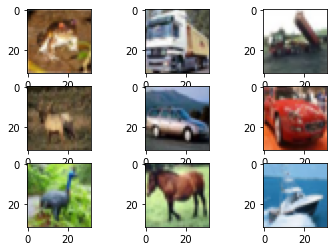

In [2]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

Baseline 1 VGG Block

In [0]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [0]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [0]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [6]:
 # load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=20, batch_size=64, validation_data=(testX, testY), verbose=1)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 144us/step - loss: 1.7918 - accuracy: 0.3567 - val_loss: 1.5593 - val_accuracy: 0.4405
Epoch 2/20
50000/50000 [==============================] - 6s 118us/step - loss: 1.4543 - accuracy: 0.4835 - val_loss: 1.3431 - val_accuracy: 0.5182
Epoch 3/20
50000/50000 [==============================] - 6s 117us/step - loss: 1.3002 - accuracy: 0.5405 - val_loss: 1.2852 - val_accuracy: 0.5448
Epoch 4/20
50000/50000 [==============================] - 6s 118us/step - loss: 1.1929 - accuracy: 0.5793 - val_loss: 1.1998 - val_accuracy: 0.5763
Epoch 5/20
50000/50000 [==============================] - 6s 119us/step - loss: 1.1082 - accuracy: 0.6117 - val_loss: 1.1227 - val_accuracy: 0.6011
Epoch 6/20
50000/50000 [==============================] - 6s 118us/step - loss: 1.0371 - accuracy: 0.6376 - val_loss: 1.0920 - 

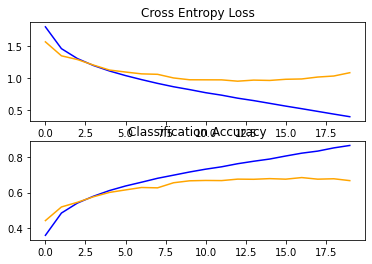

In [7]:
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.show()

In [0]:
# save model
	model.save('first_model.h5')

In [14]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join
## Now Predict
predict_dir_path='/content/drive/My Drive/app/image/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['11.jpg', '6.jpg', '3.jpg', '9.jpg', '7.jpg', '5.jpg', '2.jpg', '8.jpg', '10.jpg', '4.jpg', '1.jpg', '40.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '32.jpg', '34.jpg', '39.jpg', '33.jpg', '31.jpg', '28.jpg', '25.jpg', '24.jpg', '29.jpg', '23.jpg', '30.jpg', '26.jpg', '22.jpg', '27.jpg', '21.jpg', '16.jpg', '17.jpg', '15.jpg', '13.jpg', '18.jpg', '20.jpg', '19.jpg', '12.jpg', '14.jpg']


In [15]:
# predicting images
from keras.preprocessing import image
airplane = 0 
automobile=1
bird=2
cat=3
deer=4
dog=5
frog=6
horse=7
ship=8
truck=9
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    model = load_model('/content/first_model.h5')
    result = model.predict_classes(images, batch_size=10)

    
    
    if result == 0:
        print(file + ": " + 'airplane')
        airplane += 1
    elif result==1:
        print(file + ": " + 'automobile')
        automobile += 1
    elif result==2:
        print(file + ": " + 'bird')
        bird += 1
    elif result==3:
        print(file + ": " + 'cat')
        cat +=1
    elif result==4:
        print(file + ": " + 'deer')
        deer +=1
    elif result==5:
        print(file + ": " + 'dog')
        dog +=1
    elif result==6:
        print(file + ": " + 'frog')
        frog +=1
    elif result==7:
        print(file + ": " + 'horse')
        horse +=1
    elif result==8:
        print(file + ": " + 'ship')
        ship +=1
    elif result==9:
        print(file + ": " + 'truck')
        truck +=1
    
           
print("Total airplane :",airplane)
print("Total automobile :",automobile)
print("Total bird :",bird)
print("Total cat :",cat)
print("Total deer :",deer)
print("Total dog :",dog)
print("Total frog :",frog)
print("Total horse :",horse)
print("Total ship :",ship)
print("Total truck :",truck)

11.jpg: automobile
6.jpg: airplane
3.jpg: airplane
9.jpg: truck
7.jpg: airplane
5.jpg: airplane
2.jpg: truck
8.jpg: airplane
10.jpg: automobile
4.jpg: horse
1.jpg: cat
40.jpg: truck
35.jpg: ship
36.jpg: ship
37.jpg: truck
38.jpg: truck
32.jpg: airplane
34.jpg: ship
39.jpg: automobile
33.jpg: truck
31.jpg: horse
28.jpg: frog
25.jpg: frog
24.jpg: dog
29.jpg: horse
23.jpg: truck
30.jpg: deer
26.jpg: frog
22.jpg: truck
27.jpg: frog
21.jpg: dog
16.jpg: truck
17.jpg: horse
15.jpg: truck
13.jpg: truck
18.jpg: truck
20.jpg: airplane
19.jpg: bird
12.jpg: truck
14.jpg: bird
Total airplane : 7
Total automobile : 4
Total bird : 4
Total cat : 4
Total deer : 5
Total dog : 7
Total frog : 10
Total horse : 11
Total ship : 11
Total truck : 22


# Baseline: 2 VGG Blocks

In [0]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [25]:
# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=20, batch_size=64, validation_data=(testX, testY), verbose=1)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 10s 191us/step - loss: 1.7400 - accuracy: 0.3716 - val_loss: 1.4652 - val_accuracy: 0.4777
Epoch 2/20
50000/50000 [==============================] - 8s 166us/step - loss: 1.3948 - accuracy: 0.5023 - val_loss: 1.3658 - val_accuracy: 0.5094
Epoch 3/20
50000/50000 [==============================] - 8s 167us/step - loss: 1.2408 - accuracy: 0.5605 - val_loss: 1.1959 - val_accuracy: 0.5670
Epoch 4/20
50000/50000 [==============================] - 8s 167us/step - loss: 1.1315 - accuracy: 0.6008 - val_loss: 1.1705 - val_accuracy: 0.5871
Epoch 5/20
50000/50000 [==============================] - 8s 167us/step - loss: 1.0466 - accuracy: 0.6329 - val_loss: 1.0336 - val_accuracy: 0.6414
Epoch 6/20
50000/50000 [==============================] - 8s 168us/step - loss: 0.9649 - accuracy: 0.6624 - val_loss: 1.0212 - val_accuracy: 0.6419
Epoch 7/20
50000/50000 [==============================] - 8s 

In [0]:
# save model
	model.save('second_model.h5')

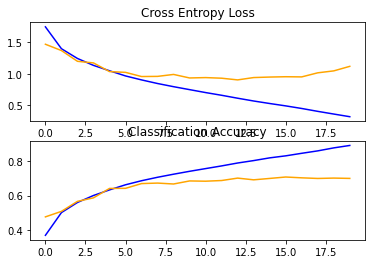

In [27]:
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.show()

In [28]:
# predicting images
from keras.preprocessing import image
airplane = 0 
automobile=1
bird=2
cat=3
deer=4
dog=5
frog=6
horse=7
ship=8
truck=9
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    model = load_model('/content/second_model.h5')
    result = model.predict_classes(images, batch_size=10)

    
    
    if result == 0:
        print(file + ": " + 'airplane')
        airplane += 1
    elif result==1:
        print(file + ": " + 'automobile')
        automobile += 1
    elif result==2:
        print(file + ": " + 'bird')
        bird += 1
    elif result==3:
        print(file + ": " + 'cat')
        cat +=1
    elif result==4:
        print(file + ": " + 'deer')
        deer +=1
    elif result==5:
        print(file + ": " + 'dog')
        dog +=1
    elif result==6:
        print(file + ": " + 'frog')
        frog +=1
    elif result==7:
        print(file + ": " + 'horse')
        horse +=1
    elif result==8:
        print(file + ": " + 'ship')
        ship +=1
    elif result==9:
        print(file + ": " + 'truck')
        truck +=1
    
           
print("Total airplane :",airplane)
print("Total automobile :",automobile)
print("Total bird :",bird)
print("Total cat :",cat)
print("Total deer :",deer)
print("Total dog :",dog)
print("Total frog :",frog)
print("Total horse :",horse)
print("Total ship :",ship)
print("Total truck :",truck)

11.jpg: truck
6.jpg: airplane
3.jpg: cat
9.jpg: frog
7.jpg: airplane
5.jpg: airplane
2.jpg: truck
8.jpg: airplane
10.jpg: truck
4.jpg: airplane
1.jpg: cat
40.jpg: truck
35.jpg: ship
36.jpg: ship
37.jpg: truck
38.jpg: truck
32.jpg: horse
34.jpg: ship
39.jpg: truck
33.jpg: truck
31.jpg: horse
28.jpg: bird
25.jpg: frog
24.jpg: dog
29.jpg: deer
23.jpg: truck
30.jpg: dog
26.jpg: airplane
22.jpg: cat
27.jpg: frog
21.jpg: dog
16.jpg: airplane
17.jpg: deer
15.jpg: airplane
13.jpg: bird
18.jpg: deer
20.jpg: airplane
19.jpg: horse
12.jpg: automobile
14.jpg: bird
Total airplane : 9
Total automobile : 2
Total bird : 5
Total cat : 6
Total deer : 7
Total dog : 8
Total frog : 9
Total horse : 10
Total ship : 11
Total truck : 18


# Baseline: 3 VGG Blocks

In [0]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [30]:
# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=20, batch_size=64, validation_data=(testX, testY), verbose=1)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 13s 251us/step - loss: 1.7863 - accuracy: 0.3545 - val_loss: 1.5020 - val_accuracy: 0.4514
Epoch 2/20
50000/50000 [==============================] - 11s 211us/step - loss: 1.3740 - accuracy: 0.5064 - val_loss: 1.2815 - val_accuracy: 0.5365
Epoch 3/20
50000/50000 [==============================] - 11s 211us/step - loss: 1.2047 - accuracy: 0.5730 - val_loss: 1.1517 - val_accuracy: 0.5925
Epoch 4/20
50000/50000 [==============================] - 11s 212us/step - loss: 1.0874 - accuracy: 0.6169 - val_loss: 1.0826 - val_accuracy: 0.6232
Epoch 5/20
50000/50000 [==============================] - 11s 211us/step - loss: 0.9773 - accuracy: 0.6598 - val_loss: 1.0036 - val_accuracy: 0.6499
Epoch 6/20
50000/50000 [==============================] - 10s 210us/step - loss: 0.8989 - accuracy: 0.6872 - val_loss: 0.9605 - val_accuracy: 0.6667
Epoch 7/20
50000/50000 [==============================] 

In [0]:
# save model
	model.save('Third_model.h5')

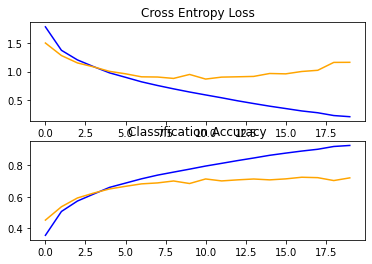

In [32]:
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.show()

In [33]:
# predicting images
from keras.preprocessing import image
airplane = 0 
automobile=1
bird=2
cat=3
deer=4
dog=5
frog=6
horse=7
ship=8
truck=9
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    model = load_model('/content/Third_model.h5')
    result = model.predict_classes(images, batch_size=10)

    
    
    if result == 0:
        print(file + ": " + 'airplane')
        airplane += 1
    elif result==1:
        print(file + ": " + 'automobile')
        automobile += 1
    elif result==2:
        print(file + ": " + 'bird')
        bird += 1
    elif result==3:
        print(file + ": " + 'cat')
        cat +=1
    elif result==4:
        print(file + ": " + 'deer')
        deer +=1
    elif result==5:
        print(file + ": " + 'dog')
        dog +=1
    elif result==6:
        print(file + ": " + 'frog')
        frog +=1
    elif result==7:
        print(file + ": " + 'horse')
        horse +=1
    elif result==8:
        print(file + ": " + 'ship')
        ship +=1
    elif result==9:
        print(file + ": " + 'truck')
        truck +=1
    
           
print("Total airplane :",airplane)
print("Total automobile :",automobile)
print("Total bird :",bird)
print("Total cat :",cat)
print("Total deer :",deer)
print("Total dog :",dog)
print("Total frog :",frog)
print("Total horse :",horse)
print("Total ship :",ship)
print("Total truck :",truck)

11.jpg: airplane
6.jpg: airplane
3.jpg: cat
9.jpg: truck
7.jpg: airplane
5.jpg: airplane
2.jpg: cat
8.jpg: airplane
10.jpg: horse
4.jpg: cat
1.jpg: cat
40.jpg: truck
35.jpg: ship
36.jpg: ship
37.jpg: truck
38.jpg: truck
32.jpg: horse
34.jpg: ship
39.jpg: automobile
33.jpg: airplane
31.jpg: deer
28.jpg: cat
25.jpg: frog
24.jpg: dog
29.jpg: deer
23.jpg: truck
30.jpg: bird
26.jpg: frog
22.jpg: truck
27.jpg: frog
21.jpg: dog
16.jpg: truck
17.jpg: deer
15.jpg: airplane
13.jpg: bird
18.jpg: deer
20.jpg: airplane
19.jpg: deer
12.jpg: automobile
14.jpg: airplane
Total airplane : 9
Total automobile : 3
Total bird : 4
Total cat : 8
Total deer : 9
Total dog : 7
Total frog : 9
Total horse : 9
Total ship : 11
Total truck : 16
